In [72]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

MIN_X, MAX_X = -30, 35
MIN_Y, MAX_Y = -35, 35
N_SAMPLES = 100

In [81]:
def plot_terrain(terrain_z, sea_level=100):
    # figure setup
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    
    # init grid
    x = np.linspace(MIN_X, MAX_X, N_SAMPLES)
    y = np.linspace(MIN_Y, MAX_Y, N_SAMPLES)
    X, Y = np.meshgrid(x, y)
        
    # plot terrain
    Z = terrain_z(X, Y)
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    
    # plot sea
    Z_sea = 0 * X + sea_level
    ax.plot_surface(X, Y, Z_sea, alpha=0.4, color='blue')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.title('Landscape')
    plt.show()

## Warmup with lines and points

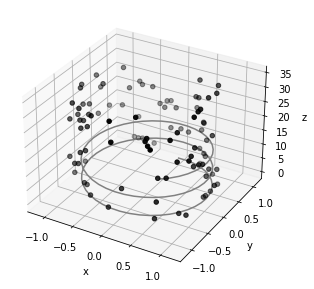

In [71]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')

# lines
zline = np.linspace(0,15,100)
xline = np.sin(zline)
yline = np.cos(zline)

ax.plot(xline, yline, zline, 'gray')

# points
zdata = 35 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)

ax.scatter(xdata, ydata, zdata, color='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


## Surface and sea

#### Pure noise

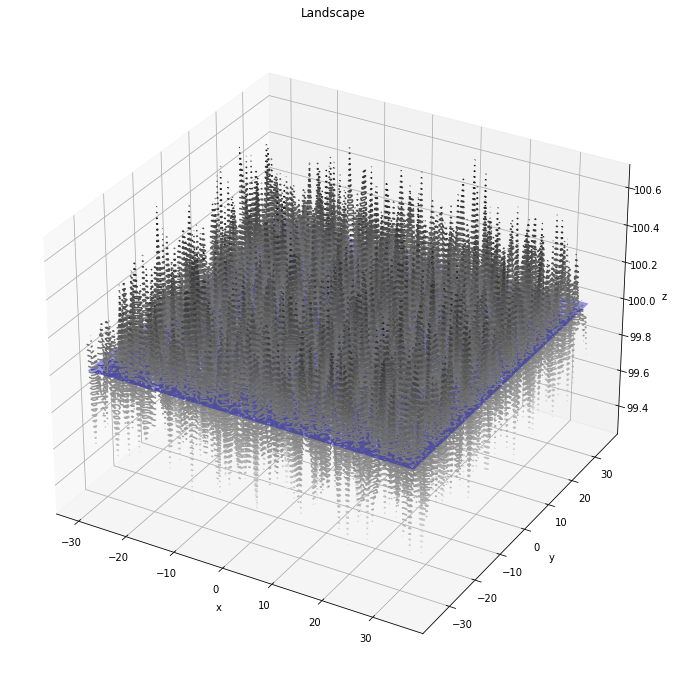

In [88]:
def pure_noise(x, y, freq=0.2, amp=10, altitude=100, noise=0.2):
    return altitude + noise*np.random.randn(*x.shape)

plot_terrain(pure_noise)

#### Single sine

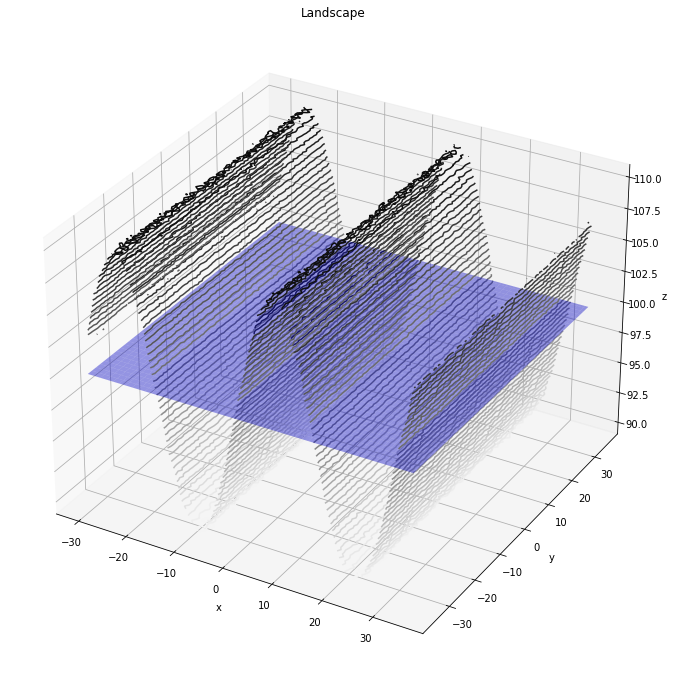

In [87]:
def single_sine(x, y, freq=0.2, amp=10, altitude=100, noise=0.2):
    return altitude + np.sin(x * freq) * amp + noise*np.random.randn(*x.shape)

plot_terrain(single_sine)

#### Double sine

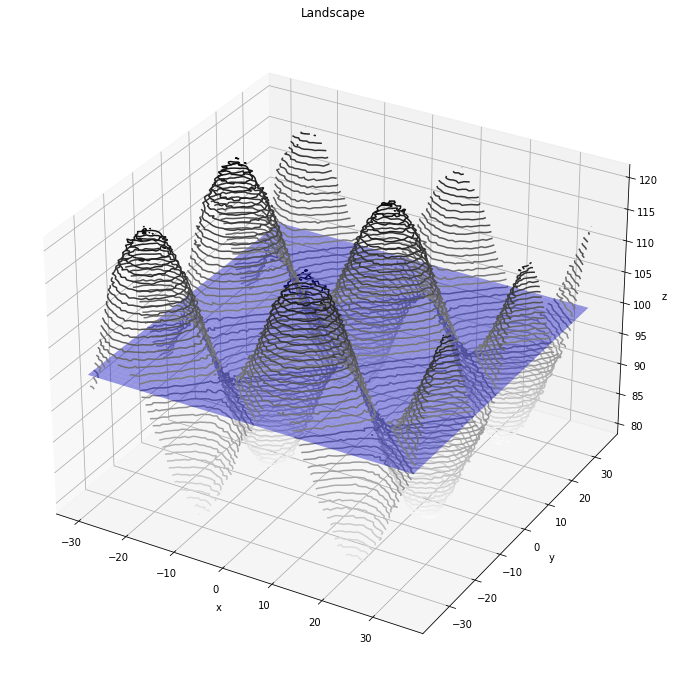

In [83]:
def double_sine(x, y, freq=0.2, amp=10, altitude=100, noise=0.5):
    x_offset = np.sin(x * freq) * amp
    y_offset = np.sin(y * freq) * amp
    surface_z = altitude + x_offset + y_offset
    return surface_z + noise*np.random.randn(*x.shape)

plot_terrain(double_sine)